In [124]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from poly_reg import *

In [125]:
plt.rcParams['figure.figsize'] = (10, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
sns.set()
np.set_printoptions(precision=3, suppress=True)
# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
x = np.linspace(-5, 5, 500)
y = x**2 +  np.random.normal(loc=0, scale=3, size=len(x))

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

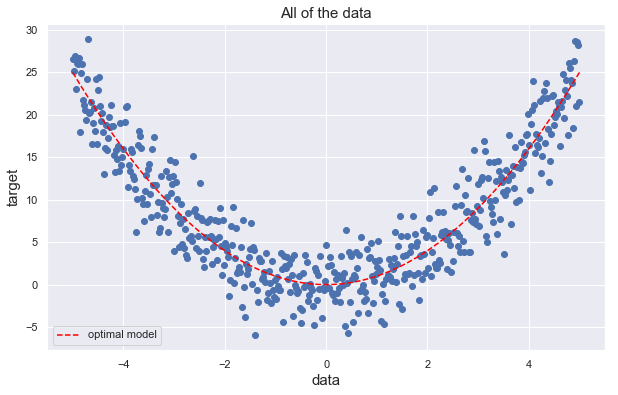

In [128]:
plt.scatter(x, y)
plt.plot(x, x**2, ls='--', c='red', label='optimal model')
plt.title('All of the data', fontsize=15)
plt.xlabel('data', fontsize=15)
plt.ylabel('target', fontsize=15)
plt.legend();

# Univariate Polynomial Regression
Simple polynomial regression is a regression model with a single explanatory variable and a single target value.

$$
\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2
$$

## Gradient Descent 

Our task is to find the best possible polynomial that explains all the points in our dataset. We start by guessing initial values for the regression parameters $\theta$ and update the values using gradient descent. 

The objective of polynomial regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
$$

where the subscript $i$ is the i'th datapoint in the dataset.


$\theta_j$ are parameters of your model and by changing those values accordingly (using **gradient descent**) you will be able to lower the cost function $J(\theta)$:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i^j
$$

In polynomial regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [129]:
train_data = np.column_stack((np.ones_like(x_train), x_train ,x_train**2))
train_data

array([[ 1.   , -4.84 , 23.422],
       [ 1.   , -1.974,  3.896],
       [ 1.   ,  2.876,  8.27 ],
       ...,
       [ 1.   , -3.677, 13.523],
       [ 1.   ,  2.776,  7.704],
       [ 1.   , -3.437, 11.812]])

In [130]:
iterations = 150
theta = np.random.random(train_data.shape[1])

print('θ before training:', theta)
theta, loss = gradient_descent(train_data, y_train, theta, 0.005, iterations)
print('θ after training:', theta)

θ before training: [0.942 0.85  0.845]
θ after training: [0.661 0.02  0.961]


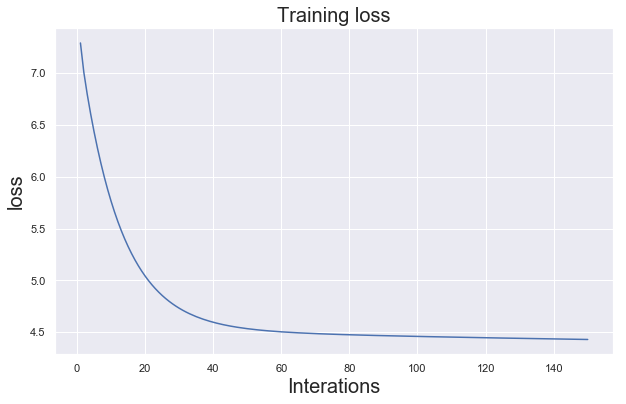

In [131]:
plt.plot(range(1, iterations+1), loss)
plt.title('Training loss', fontsize=20)
plt.xlabel('Interations', fontsize=20)
plt.ylabel('loss', fontsize=20);

In [134]:
train_data = train_data[train_data[:,1].argsort()]
predictions = train_data @ theta

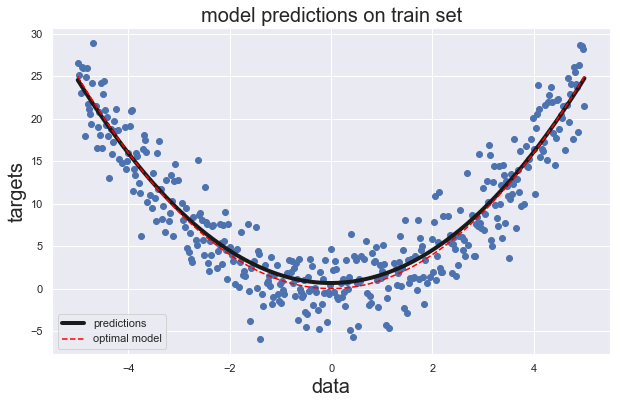

In [137]:
plt.scatter(x_train, y_train)
plt.plot(sorted(x_train), predictions, 'k', lw=4, label='predictions')
plt.plot(x, x**2, linestyle='--', color='red', label='optimal model')
plt.legend()
plt.xlabel('data', fontsize=20)
plt.ylabel('targets', fontsize=20)
plt.title('model predictions on train set', fontsize=20);

In [138]:
test_data = np.column_stack((np.ones_like(x_test), x_test, x_test**2))
test_data

array([[ 1.   ,  4.94 , 24.402],
       [ 1.   , -1.914,  3.663],
       [ 1.   , -2.295,  5.265],
       [ 1.   ,  3.257, 10.605],
       [ 1.   , -0.331,  0.109],
       [ 1.   , -0.912,  0.831],
       [ 1.   ,  3.918, 15.349],
       [ 1.   ,  3.958, 15.665],
       [ 1.   ,  2.255,  5.083],
       [ 1.   ,  4.599, 21.153],
       [ 1.   , -1.874,  3.511],
       [ 1.   ,  4.639, 21.523],
       [ 1.   , -2.976,  8.856],
       [ 1.   , -1.533,  2.35 ],
       [ 1.   , -3.497, 12.229],
       [ 1.   ,  2.555,  6.529],
       [ 1.   ,  4.138, 17.125],
       [ 1.   , -2.315,  5.358],
       [ 1.   , -2.575,  6.631],
       [ 1.   , -0.852,  0.725],
       [ 1.   ,  0.631,  0.398],
       [ 1.   , -1.333,  1.776],
       [ 1.   ,  3.818, 14.574],
       [ 1.   ,  2.655,  7.051],
       [ 1.   , -3.737, 13.969],
       [ 1.   ,  4.399, 19.349],
       [ 1.   , -1.834,  3.362],
       [ 1.   , -3.557, 12.653],
       [ 1.   ,  1.673,  2.8  ],
       [ 1.   , -3.216, 10.345],
       [ 1

In [139]:
test_data = test_data[test_data[:,1].argsort()]
predictions = test_data @ theta

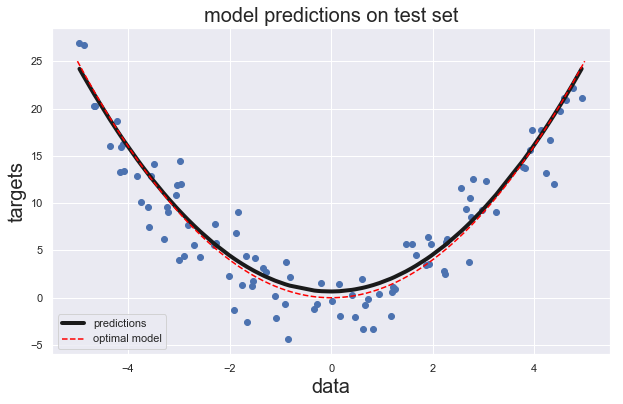

In [140]:
plt.scatter(x_test, y_test)
plt.plot(sorted(x_test), predictions, 'k', lw=4, label='predictions')
plt.plot(x, x**2, linestyle='--', color='red', label='optimal model')
plt.legend()
plt.xlabel('data', fontsize=20)
plt.ylabel('targets', fontsize=20)
plt.title('model predictions on test set', fontsize=20);